<a href="https://colab.research.google.com/github/sriram-2490/Virtual_assitant/blob/master/final_parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt 

In [ ]:
data = pd.read_csv("pd_speech_features.csv")

In [ ]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [ ]:
x=data.loc[:,data.columns!="class"]
y=data.loc[:,"class"]
y.value_counts()

1    564
0    192
Name: class, dtype: int64

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.3)
x_train

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
182,60,0,0.47012,0.68923,0.56710,335,334,0.005758,0.001560,0.00351,...,8.2985,12.0478,7.6149,2.6906,2.4633,2.7684,18.1463,21.1227,25.0390,10.1173
575,191,1,0.81741,0.63870,0.54005,249,248,0.007776,0.000053,0.00121,...,1.5844,1.5883,3.0578,2.6221,2.9641,3.1141,2.9502,4.4095,3.3050,11.6049
399,133,0,0.84591,0.60866,0.59179,472,471,0.004091,0.000234,0.00263,...,76.6302,35.0462,62.7041,50.5068,28.7728,23.4105,30.2428,44.5080,41.9666,79.8961
583,194,0,0.86410,0.72404,0.21847,520,519,0.003713,0.000022,0.00048,...,69.8380,28.8705,27.0722,16.8942,6.9145,7.9410,9.1942,6.2766,5.1194,6.1003
223,74,1,0.47019,0.75495,0.63768,227,226,0.008497,0.002735,0.00835,...,184.0917,115.2017,76.3111,10.3347,3.3531,3.5236,16.8188,30.3167,27.3304,14.9176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,23,1,0.31431,0.77186,0.62721,231,230,0.008341,0.000250,0.00327,...,3.4251,4.7490,7.6582,12.3930,3.1410,2.9371,4.4207,6.4558,4.9663,5.0628
106,35,0,0.82435,0.67512,0.37135,415,414,0.004644,0.000030,0.00076,...,6.3202,5.2622,3.3257,2.6209,2.5962,2.9097,3.4120,2.6230,2.7187,3.0654
270,90,0,0.50598,0.64620,0.69831,168,167,0.011474,0.000296,0.00729,...,2.1926,6.1377,6.1270,4.7823,4.8881,2.5868,2.9627,3.8031,3.7451,2.9601
435,145,1,0.82759,0.63558,0.37521,344,343,0.005612,0.000053,0.00121,...,57.3059,160.6611,130.0455,100.7989,56.3096,32.9181,39.1589,46.2313,38.2874,42.7546


In [ ]:
sc=StandardScaler()
x_train.loc[:,:]= sc.fit_transform(x_train)
x_test.loc[:,:]=sc.transform(x_test)
x_train.shape , x_test.shape

((529, 754), (227, 754))

In [ ]:
data[['gender', 'class']].groupby(['class'], as_index=False).mean().sort_values(by='class', ascending=False)

,class,gender
1,1,0.569149
0,0,0.359375


In [ ]:
y_train.isnull().sum()

0

In [ ]:
af= RandomForestClassifier(n_estimators=150,random_state=42)  
af.fit(x_train,y_train)
a_pred=af.predict(x_test)
a=metrics.accuracy_score(a_pred,y_test)*100
b=metrics.precision_score(y_test,a_pred)*100
c=metrics.recall_score(y_test,a_pred)*100
d=metrics.f1_score(y_test, a_pred)*100
print("accuracy_rf_test:",a)
print("Precision_rf_test:",b)
print("Recall_rf_test:",c)
print("f1_rf_test:",d)
print()
a_pred_train=af.predict(x_train)
a_train=metrics.accuracy_score(a_pred_train,y_train)*100
b_train=metrics.precision_score(y_train,a_pred_train)*100
c_train=metrics.recall_score(y_train,a_pred_train)*100
d_train=metrics.f1_score(y_train, a_pred_train)*100
print("accuracy_rf_train:",a_train)
print("Precision_rf_train:",b_train)
print("Recall_rf_train:",c_train)
print("f1_rf_train:",d_train)

accuracy_rf_test: 85.90308370044053
Precision_rf_test: 85.63829787234043
Recall_rf_test: 96.98795180722891
f1_rf_test: 90.96045197740114

accuracy_rf_train: 100.0
Precision_rf_train: 100.0
Recall_rf_train: 100.0
f1_rf_train: 100.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


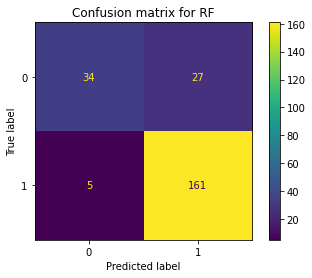

In [ ]:
cm_rf = confusion_matrix(y_test, a_pred)
plot_confusion_matrix(af, x_test, y_test) 
plt.title('Confusion matrix for RF')
plt.show()

Text(0.5, 1.0, 'percentage of parameters of RF')

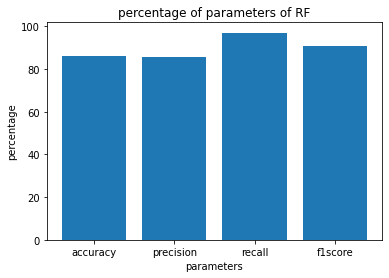

In [ ]:
x=('accuracy','precision','recall','f1score')
y=(a,b,c,d)
plt.bar(x,y)
plt.xlabel("parameters")
plt.ylabel("percentage")
plt.title("percentage of parameters of RF")

In [ ]:
bf=DecisionTreeClassifier()
bf.fit(x_train,y_train)
b_pred=bf.predict(x_test)
e=metrics.accuracy_score(b_pred,y_test)*100
f=metrics.precision_score(y_test,b_pred)*100
g=metrics.recall_score(y_test, b_pred)*100
h=metrics.f1_score(y_test, b_pred)*100
print("accuracy_dt_test:",e)
print("Precision_dt_test:",f)
print("Recall_dt_test:",g)
print("f1_dt_test:",h)
print()
b_pred_train=bf.predict(x_train)
e_train=metrics.accuracy_score(b_pred_train,y_train)*100
f_train=metrics.precision_score(y_train,b_pred_train)*100
g_train=metrics.recall_score(y_train,b_pred_train)*100
h_train=metrics.f1_score(y_train, b_pred_train)*100
print("accuracy_dt_train:",e_train)
print("Precision_dt_train:",f_train)
print("Recall_dt_train:",g_train)
print("f1_dt_train:",h_train)

accuracy_dt_test: 75.77092511013215
Precision_dt_test: 83.63636363636363
Recall_dt_test: 83.13253012048193
f1_dt_test: 83.38368580060423

accuracy_dt_train: 100.0
Precision_dt_train: 100.0
Recall_dt_train: 100.0
f1_dt_train: 100.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


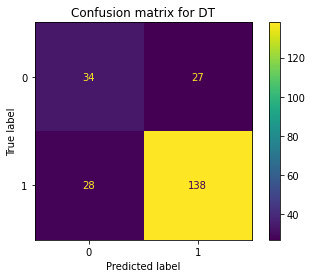

In [ ]:
cm_dt = confusion_matrix(y_test, b_pred)
plot_confusion_matrix(bf, x_test, y_test) 
plt.title('Confusion matrix for DT')
plt.show()

Text(0.5, 1.0, 'percentage of parameters of DT')

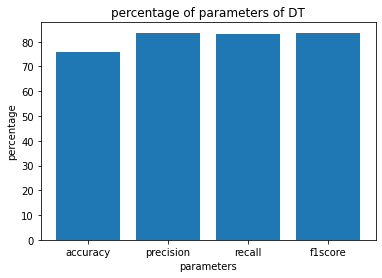

In [ ]:
x=('accuracy','precision','recall','f1score')
y=(e,f,g,h)
plt.bar(x,y)
plt.xlabel("parameters")
plt.ylabel("percentage")
plt.title("percentage of parameters of DT")

In [ ]:
cf = KNeighborsClassifier()
cf.fit(x_train,y_train)
c_pred=cf.predict(x_test)
i=metrics.accuracy_score(c_pred,y_test)*100
j=metrics.precision_score(y_test,c_pred)*100
k=metrics.recall_score(y_test, c_pred)*100
l=metrics.f1_score(y_test, c_pred)*100
print("accuracy_knn_test:",i)
print("Precision_knn_test:",j)
print("Recall_knn_test:",k)
print("f1_knn_text:",l)
print()
c_pred_train=cf.predict(x_train)
i_train=metrics.accuracy_score(c_pred_train,y_train)*100
j_train=metrics.precision_score(y_train,c_pred_train)*100
k_train=metrics.recall_score(y_train,c_pred_train)*100
l_train=metrics.f1_score(y_train, c_pred_train)*100
print("accuracy_knn_train:",i_train)
print("Precision_knn_train:",j_train)
print("Recall_knn_train:",k_train)
print("f1_knn_train:",l_train)

accuracy_knn_test: 87.22466960352423
Precision_knn_test: 85.49222797927462
Recall_knn_test: 99.3975903614458
f1_knn_text: 91.92200557103064

accuracy_knn_train: 91.30434782608695
Precision_knn_train: 90.93023255813954
Recall_knn_train: 98.24120603015075
f1_knn_train: 94.44444444444444


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


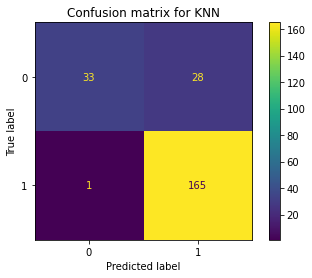

In [ ]:
cm_knn = confusion_matrix(y_test, c_pred)
plot_confusion_matrix(cf, x_test, y_test) 
plt.title('Confusion matrix for KNN')
plt.show()

Text(0.5, 1.0, 'percentage of parameters of KNN')

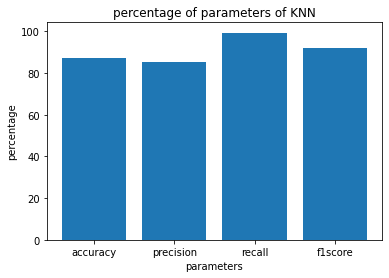

In [ ]:
x=('accuracy','precision','recall','f1score')
y=(i,j,k,l)
plt.bar(x,y)
plt.xlabel("parameters")
plt.ylabel("percentage")
plt.title("percentage of parameters of KNN")

In [ ]:
df = SVC() 
df.fit(x_train,y_train)
d_pred=df.predict(x_test)
m=metrics.accuracy_score(d_pred,y_test)*100
n=metrics.precision_score(y_test,d_pred)*100
o=metrics.recall_score(y_test, d_pred)*100
p=metrics.f1_score(y_test, d_pred)*100
print("accuracy_svm_test:",m)
print("Precision_svm_test:",n)
print("Recall_svm_test:",o)
print("f1_svm_test:",p)
print()
d_pred_train=df.predict(x_train)
m_train=metrics.accuracy_score(d_pred_train,y_train)*100
n_train=metrics.precision_score(y_train,d_pred_train)*100
o_train=metrics.recall_score(y_train,d_pred_train)*100
p_train=metrics.f1_score(y_train, d_pred_train)*100
print("accuracy_svm_train:",m_train)
print("Precision_svm_train:",n_train)
print("Recall_svm_train:",o_train)
print("f1_svm_train:",p_train)

accuracy_svm_test: 83.70044052863436
Precision_svm_test: 82.08955223880598
Recall_svm_test: 99.3975903614458
f1_svm_test: 89.9182561307902

accuracy_svm_train: 92.24952741020795
Precision_svm_train: 91.22401847575058
Recall_svm_train: 99.2462311557789
f1_svm_train: 95.0661853188929


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


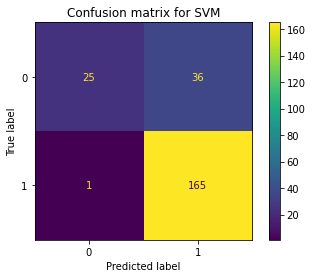

In [ ]:
cm_svm = confusion_matrix(y_test, d_pred)
plot_confusion_matrix(df, x_test, y_test) 
plt.title('Confusion matrix for SVM')
plt.show()

Text(0.5, 1.0, 'percentage of parameters of SVM')

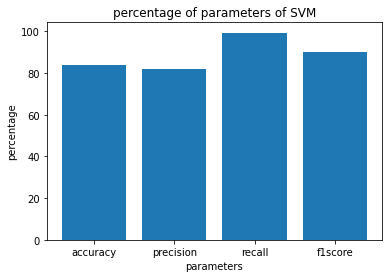

In [ ]:
x=('accuracy','precision','recall','f1score')
y=(m,n,o,p)
plt.bar(x,y)
plt.xlabel("parameters")
plt.ylabel("percentage")
plt.title("percentage of parameters of SVM")

In [ ]:
ef= GaussianNB()
ef.fit(x_train,y_train)
e_pred=ef.predict(x_test)
q=metrics.accuracy_score(e_pred,y_test)*100
r=metrics.precision_score(y_test,e_pred)*100
s=metrics.recall_score(y_test, e_pred)*100
t=metrics.f1_score(y_test, e_pred)*100
print("accuracy_nb_test:",q)
print("Precision_nb_test:",r)
print("Recall_nb_test:",s)
print("f1_nb_test:",t)
print()
e_pred_train=ef.predict(x_train)
q_train=metrics.accuracy_score(e_pred_train,y_train)*100
r_train=metrics.precision_score(y_train,e_pred_train)*100
s_train=metrics.recall_score(y_train,e_pred_train)*100
t_train=metrics.f1_score(y_train, e_pred_train)*100
print("accuracy_nb_train:",q_train)
print("Precision_nb_train:",r_train)
print("Recall_nb_train:",s_train)
print("f1_nb_train:",t_train)

accuracy_nb_test: 76.65198237885463
Precision_nb_test: 86.45161290322581
Recall_nb_test: 80.72289156626506
f1_nb_test: 83.48909657320873

accuracy_nb_train: 82.6086956521739
Precision_nb_train: 90.47619047619048
Recall_nb_train: 85.92964824120602
f1_nb_train: 88.14432989690721


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


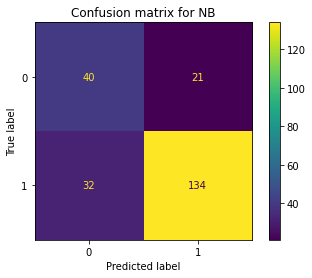

In [ ]:
cm_nb = confusion_matrix(y_test, e_pred)
plot_confusion_matrix(ef, x_test, y_test) 
plt.title('Confusion matrix for NB')
plt.show()

Text(0.5, 1.0, 'percentage of parameters of NB')

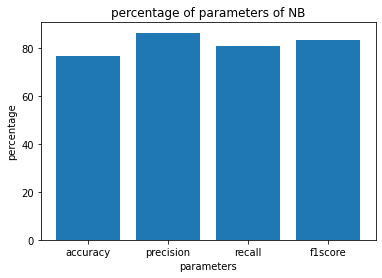

In [ ]:
x=('accuracy','precision','recall','f1score')
y=(q,r,s,t)
plt.bar(x,y)
plt.xlabel("parameters")
plt.ylabel("percentage")
plt.title("percentage of parameters of NB")

In [ ]:
input_data=(0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,1.76E-05,0.00067,0.00129,0.002,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.9974958,76.08804597,72.46551224,539.3427351,1031.84904,2447.162183,3655.054806,101.0922179,83.14744022,255.21483,396.6436311,0.77778,11.7245,2.8277,1.173,0.26512,0.083127,1200445.612,1.5347,3.0152,0.00046263,0.00025997,0.83621,209.6062,455.9654,1.2825,1.3305,51.6843,5.7784,23.261,0.2685,5.8573,0.20023,9.1817,11.4283,8.4781,2.4874,0.02292,0.55527,-1.6334,-1.5144,0.39725,0.61775,0.091821,0.54775,-0.0068247,-0.67274,-0.001013,-7.50E-05,-0.0033637,-0.00019208,0.0013567,-0.00089961,-0.003002,0.0015484,0.0051873,-0.00020542,-0.0047367,0.0024652,0.0025138,-0.0011875,-0.00017942,-0.00082784,-0.00049845,0.0013855,0.00017264,-0.00028585,0.00042833,-4.41E-05,-0.00033822,0.00043047,3.83E-05,-0.00035615,-7.62E-05,2.66E-05,0.34158,1.0279,0.65735,0.78036,0.30141,0.35418,0.19127,0.22892,0.3355,0.17101,0.28111,0.21511,0.16605,0.17762,0.049933,0.17226,0.089754,0.14627,0.040231,0.060808,0.030284,0.02883,0.042253,0.028115,0.04718,0.035775,0.020827,0.023057,0.016392,0.0788,0.043847,0.06641,0.021565,0.029594,0.015351,0.014642,0.019681,0.012829,0.021703,0.017089,0.010043,0.01213,99.9996,1.53E-07,8.86E-07,7.43E-06,2.10E-05,0.00010224,1.31E-05,4.06E-05,2.69E-05,1.04E-05,0.00020186,1.7166,5.5625,0.04894,-72.2192,-866.9373,-54.5335,-319.9468,-165.257,-42.9705,-2336.3644,-779.1377,-290.208,-78.3447,-10.7944,10.5089,-46.3816,-35.9347,-46.8515,-31.2923,-18.7456,0.0024859,0.02815,0.32455,1.5948,7.7828,2.3013,5.6628,3.5683,2.0302,44.7582,0.005012,0.046228,0.68635,3.5072,26.1213,3.7358,15.283,9.2028,4.7887,89.767,-34415952.86,-41505780.29,-54991273,-79779216.69,-129684181.7,-232253303.7,-459058057.8,-902118385.7,-1886558836,-3937753319,1116.2921,672.8105,445.4876,322.8542,262.2272,234.6861,231.969,227.8718,238.269,248.6663,572.1636,2023.8169,6477.7714,18923.0837,49173.8993,115701.9285,245931.5887,524800.1114,1049747.089,2101636.245,4181.8549,11092.1222,27917.7341,67151.7571,151463.1285,326874.1892,672089.5253,1381934.183,2777808.879,5547195.189,100,6.59E-09,3.86E-08,3.25E-07,9.05E-07,4.39E-06,5.71E-07,1.73E-06,1.15E-06,4.50E-07,8.71E-06,0.00033833,0.0016911,0.011168,0.026503,0.095478,0.01607,0.039222,0.029105,0.012719,0.14851,-1820.192,-871.5514,-446.3217,-261.8311,-182.3583,-210.734,-190.3697,-192.1166,-175.6679,-163.4186,1.62E-07,1.85E-06,2.15E-05,0.00010395,0.00050042,0.00015082,0.00036353,0.00022942,0.00013184,0.0029043,3.25E-07,3.04E-06,4.55E-05,0.00022608,0.0016888,0.00024467,0.00098152,0.0005974,0.00031087,0.0058211,-19278.0371,-25711.8622,-36938.137,-57264.6625,-98433.1856,-184901.7535,-381059.351,-776445.2329,-1676725.978,-3601122.613,414.6434,276.485,198.5803,153.8978,132.2489,124.1971,127.9812,130.3804,140.7776,151.1748,0.86121,3.0487,9.7825,28.5949,74.3411,174.9214,371.7296,793.068,1586.1824,3173.0448,6.299,16.7003,42.0762,101.0889,228.8489,493.8563,1015.7707,2091.946,4188.2456,8373.9278,1.11E-05,3.98E-06,4.92E-06,3.54E-06,7.19E-06,3.87E-05,0.00016363,0.0003761,0.00039246,0.0004061,0.00041458,0.00023899,0.0019048,0.012066,0.029439,0.037555,0.089055,0.17728,0.13122,0.051588,0.019785,0.05609,0.12525,0.057908,0.01007,0.057575,0.10807,0.032743,0.00025665,1.33E-05,6.75E-06,2.75E-06,2.04E-06,1.67E-06,1.11E-06,5.35E-05,0.20497,0.076626,0.091515,0.066105,0.12716,0.59587,2.1832,4.5851,4.6877,4.8635,4.884,2.818,18.8625,89.7525,174.692,189.5,360.7126,541.6719,422.8302,225.6461,99.3648,214.7895,337.8141,201.3841,53.7314,178.7287,230.2402,111.0346,2.2372,0.15901,0.083824,0.036109,0.027414,0.023151,0.015562,0.55112,-2037542.225,-1802551.782,-1485424.634,-1245979.172,-991083.9631,-745188.5092,-560498.2903,-432705.197,-352797.2473,-281439.269,-229943.2967,-201985.0408,-127736.2777,-83962.4084,-62201.7084,-52209.7866,-34671.0477,-23650.0278,-20345.6618,-18507.9939,-19238.3429,-11545.4036,-7369.2484,-7030.0263,-8442.5303,-4459.3054,-2800.8383,-3160.3491,-6399.2202,-7011.7391,-6228.1902,-5536.5796,-4540.083,-3726.2679,-3190.1752,-2528.9188,1.61E-07,7.56E-08,1.35E-07,9.89E-08,1.67E-07,1.13E-06,6.78E-06,2.44E-05,2.95E-05,3.58E-05,5.03E-05,2.33E-05,0.00012787,0.0017165,0.0069193,0.008643,0.023558,0.074782,0.064414,0.030886,0.010913,0.032924,0.13939,0.069247,0.00481,0.07756,0.25704,0.073123,0.00040142,4.43E-05,2.98E-05,1.30E-05,1.22E-05,1.26E-05,1.01E-05,1.44E-05,9.97E-07,4.14E-07,5.22E-07,6.11E-07,8.58E-07,2.53E-06,1.50E-05,4.83E-05,5.90E-05,5.87E-05,7.36E-05,5.90E-05,0.00018979,0.0012918,0.0065317,0.013296,0.02762,0.071125,0.063262,0.020787,0.01234,0.027799,0.080709,0.032363,0.0092097,0.024016,0.050924,0.017784,0.0004321,6.20E-05,4.36E-05,2.30E-05,1.77E-05,1.23E-05,9.74E-06,0.00011957,8.19E-07,2.37E-07,5.77E-20,2.84E-07,0,9.30E-07,-1.27E-07,-1.41E-18,9.16E-06,-1.71E-06,-3.10E-05,-9.93E-19,-5.56E-18,0.00056006,1.03E-05,0,0,-6.10E-17,-0.00038921,0,3.81E-17,6.15E-17,6.74E-17,0,0,-2.22E-17,-0.013372,0.056236,0.0004446,2.85E-19,0.00014027,-8.36E-05,-0.00016867,-0.00020162,-4.27E-05,-0.01432,-2.89E-21,-3.77E-21,1.70E-22,-9.18E-22,-3.98E-22,-2.86E-21,-3.52E-22,1.06E-21,1.23E-20,-1.36E-20,-1.63E-20,-2.63E-21,1.84E-21,1.34E-19,-2.65E-20,1.82E-21,9.60E-20,-7.50E-20,-1.06E-18,7.54E-21,-6.33E-20,-1.25E-18,-1.90E-18,-2.42E-19,9.38E-20,-7.21E-19,1.84E-18,-1.85E-18,-7.29E-21,2.04E-20,0,6.53E-20,-2.02E-20,7.96E-20,1.87E-20,-0.01461,0.00034139,0.00022424,0.00027317,0.00025393,0.00039625,0.0010075,0.0022682,0.003767,0.0042153,0.0046972,0.0051989,0.0043241,0.013373,0.036869,0.063087,0.078064,0.13169,0.20354,0.1918,0.13177,0.089375,0.16487,0.26991,0.20099,0.091819,0.24065,0.36097,0.21776,0.021112,0.0052758,0.0041096,0.0028762,0.0027106,0.0026957,0.0024093,0.0029658,-0.0096443,-0.005025,-0.0064911,-0.006014,-0.0085182,-0.0092406,-0.016506,-0.026006,-0.026273,-0.02416,-0.026321,-0.024286,-0.048924,-0.10839,-0.19432,-0.29603,-0.46639,-0.61778,-0.596,-0.32867,-0.26301,-0.44541,-0.66075,-0.45846,-0.2454,-0.45883,-0.65524,-0.36007,-0.060063,-0.017824,-0.013598,-0.012346,-0.009196,-0.0069326,-0.006569,-0.035389,0.01432,0.0066623,0.0064911,0.0074746,0.0085182,0.0094429,0.01609,0.026006,0.028117,0.025222,0.022796,0.024286,0.048924,0.10575,0.20486,0.29603,0.46639,0.61778,0.59309,0.32867,0.26301,0.44541,0.66075,0.45846,0.2454,0.45883,0.64375,0.39877,0.056849,0.017824,0.014505,0.0084926,0.009728,0.0067535,0.0060726,-0.0090458,0.86453,0.43538,1.11E-15,0.36745,0,-0.0043099,-0.0053825,-1.11E-17,-0.00082879,0.0016047,-0.00036202,1.01E-15,-5.85E-17,-0.0031426,0.0074332,1.51E-17,2.21E-17,-9.37E-18,0.0007342,-4.33E-18,-4.47E-17,-1.39E-17,-3.50E-17,-4.29E-19,-9.66E-18,-1.66E-17,0.00011457,-0.1029,0.030756,7.07E-17,-0.086911,-0.28507,-0.17362,0.071728,0.010352,-2.7303,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.155,2.9457,2.1993,1.983,1.8314,2.0062,1.6058,1.5466,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405)
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = cf.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


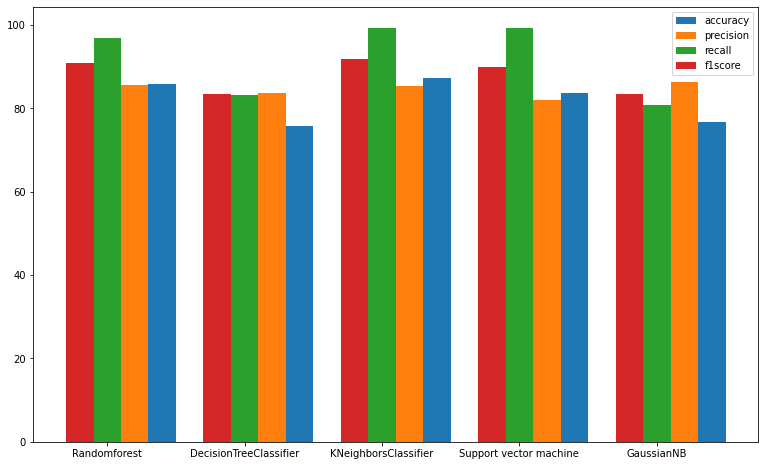

In [ ]:
plt.figure(figsize=(13,8))
models=('Randomforest','DecisionTreeClassifier','KNeighborsClassifier','Support vector machine','GaussianNB')
xp=np.arange(len(models))
accuracy=(a,e,i,m,q)
precision=(b,f,j,n,r)
recall=(c,g,k,o,s)
f1score=(d,h,l,p,t)
plt.xticks(xp,models)
plt.bar(xp+0.4,accuracy,label='accuracy',width=0.2)
plt.bar(xp+0.2,precision,label='precision',width=0.2)
plt.bar(xp,recall,label='recall',width=0.2)
plt.bar(xp-0.2,f1score,label='f1score',width=0.2)
plt.legend()

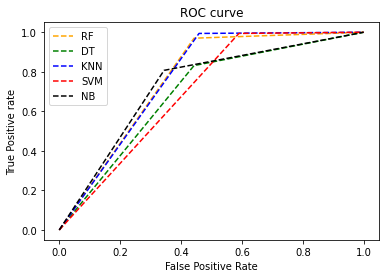

In [ ]:
fpr1, tpr1, _ = metrics.roc_curve(y_test,  a_pred)
fpr2, tpr2, _ = metrics.roc_curve(y_test,  b_pred)
fpr3, tpr3, _ = metrics.roc_curve(y_test,  c_pred)
fpr4, tpr4, _ = metrics.roc_curve(y_test,  d_pred)
fpr5, tpr5, _ = metrics.roc_curve(y_test,  e_pred)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RF')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='DT')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='SVM')
plt.plot(fpr5, tpr5, linestyle='--',color='black', label='NB')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()